# Unconventional Reservoir Production Prediction

<h2>Table of Contents</h2>

<ol>
    <li>
        <a href="#problem">Problem Definition</a>
    </li>
    <br>
    <li>
        <a href="#import">Data Collection</a>
    </li>
    <br>
    <li>
        <a href="#clean">Data Cleaning and Preparation</a>
    </li>
    <br>
    <li>
        <a href="#eda">Exploratory Data Analysis</a>
    </li>
    <br>
    <li>
        <a href="#model">Model Development and Evaluation</a>
    </li>
    <br>
    <li>
        <a href="#deploy">Deployment and Communication</a>
    </li>
    <br>
</ol>


<hr id="problem">

<h2>1. Problem Definition</h2>

<h3>Background:</h3>

we need to use a geologic data to predict the production performance in unconventional reservoirs


<h3>Data:</h3>

the data set, including:

|   Paramters   |   Description |
|   ---         |   ---     |
|   Porosity   |   is a measure of the void spaces in a rock, indicating the volume percentage of pores (open spaces) in the rock.   |
|   Matrix Perm |   measures the ability of a rock to transmit fluids. It describes the ease with which fluids can move through the rock.  |
|   Acoustic impedanceCement |   is a measure of how resistant a material is to the propagation of sound waves.   |
|   TOC  |   is the percentage of organic carbon content in a rock, typically associated with the presence of hydrocarbons.  |
|   Brittleness Ratio  |   is a measure of the propensity of a rock to break or fracture under stress.   |
|   Vitrinite Reflectance   |   is a measure of the maturity of organic matter in sedimentary rocks, often used to assess the thermal history of the rock.    |
|   Aroot(K)  |   represents a production metric, where A is the reservoir drainage area, K is permeability, and lateral ft is the lateral length of the well.    |

<h3>Objectives:</h3>

aims to develop a regression model predicting production performance in unconventional reservoirs. Utilizing a dataset containing geologic information (porosity, permeability, acoustic impedance, brittleness ratio, TOC, vitrinite reflectance), the model will analyze the impact of these variables on the productivity metric A√K/lateral ft (md^1/2 x ft). 

and we can do that by understanding the data and now how to combine between them


<hr id="import">

<h2>2. Data Collection</h2>

Import the `Pandas` library

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data from `data.csv` into a `Pandas DataFrame`

In [157]:
# Read in the data
df = pd.read_csv(r'C:\Users\Halawany Laptop\Desktop\data science\geologic_dataset.csv')
df.head()

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
0,8.456,292,3.080,97.680,4.64,1.848,48.306469
1,8.666,353,3.542,55.404,3.56,1.504,41.300912
2,9.814,259,4.411,87.360,3.56,2.176,49.688356
3,12.369,675,2.893,47.772,4.32,1.504,59.132694
4,12.264,457,3.498,13.128,6.04,1.520,39.503121


<hr id="clean">

<h2>3. Data Cleaning and Preparation</h2>

<h5 id="clean-missing">Handle missing values</h5>

Identify missing values

In [158]:
# get more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Porosity (%)                      199 non-null    float64
 1   Matrix Perm (nd)                  200 non-null    int64  
 2   Acoustic impedance (kg/m2s*10^6)  200 non-null    float64
 3   Brittleness Ratio                 199 non-null    float64
 4   TOC (%)                           200 non-null    float64
 5   Vitrinite Reflectance (%)         200 non-null    float64
 6   Aroot(K)                          199 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


In [159]:
# find the number of missing values in each column
df.isna().sum()

Porosity (%)                        1
Matrix Perm (nd)                    0
Acoustic impedance (kg/m2s*10^6)    0
Brittleness Ratio                   1
TOC (%)                             0
Vitrinite Reflectance (%)           0
Aroot(K)                            1
dtype: int64

Drop rows with "NaN" from certain columns

In [160]:
# drop the rows with missing values in the output column
df.dropna(inplace=True)

<h5 id="clean-duplicates">Remove duplicates</h5>

In [161]:
# find the number of duplicate rows
df.duplicated().sum()

0

<h5 id="clean-standardize">Standardize data</h5>

In [162]:
df['Matrix Perm (nd)'] = df['Matrix Perm (nd)'].astype(float)

<h5>Validate cleaned data</h5>

In [163]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Porosity (%)                      197 non-null    float64
 1   Matrix Perm (nd)                  197 non-null    float64
 2   Acoustic impedance (kg/m2s*10^6)  197 non-null    float64
 3   Brittleness Ratio                 197 non-null    float64
 4   TOC (%)                           197 non-null    float64
 5   Vitrinite Reflectance (%)         197 non-null    float64
 6   Aroot(K)                          197 non-null    float64
dtypes: float64(7)
memory usage: 12.3 KB


In [164]:
#check for missing values
df.isna().sum()

Porosity (%)                        0
Matrix Perm (nd)                    0
Acoustic impedance (kg/m2s*10^6)    0
Brittleness Ratio                   0
TOC (%)                             0
Vitrinite Reflectance (%)           0
Aroot(K)                            0
dtype: int64

In [165]:
# check for duplicates
df.duplicated().sum()

0

<hr id="eda">

<h2>4. Exploratory Data Analysis</h2>

<h3>Descriptive Analysis</h3>

In [166]:
df_desc = df.describe()
df_desc

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,10.493036,432.081218,3.294533,57.895066,3.977766,1.564893,50.001043
std,2.081732,172.877282,0.788964,16.982821,1.911174,0.262957,11.426132
min,4.585000,113.000000,1.408000,13.128000,0.100000,0.100000,24.437856
25%,9.044000,310.000000,2.794000,45.312000,2.480000,1.416000,41.998103
50%,10.549000,406.000000,3.245000,59.532000,4.160000,1.568000,49.696214
75%,12.173000,526.000000,3.696000,69.960000,5.400000,1.720000,58.980859
max,16.485000,987.000000,10.000000,101.196000,8.720000,2.296000,77.270733


Boxplots for each feature

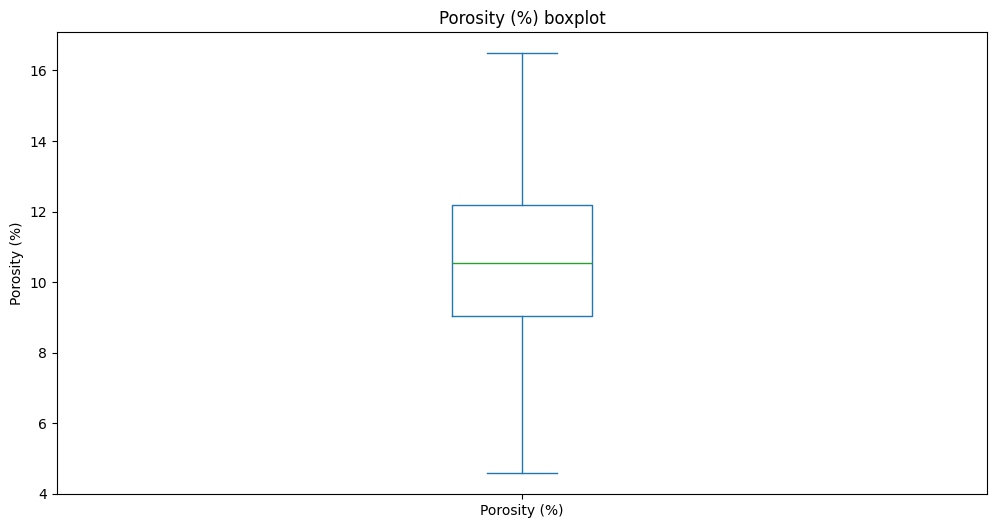

In [167]:
# box plot for Porosity (%)
df['Porosity (%)'].plot(kind='box', figsize=(12, 6), title='Porosity (%) boxplot', ylabel='Porosity (%)')
plt.show()

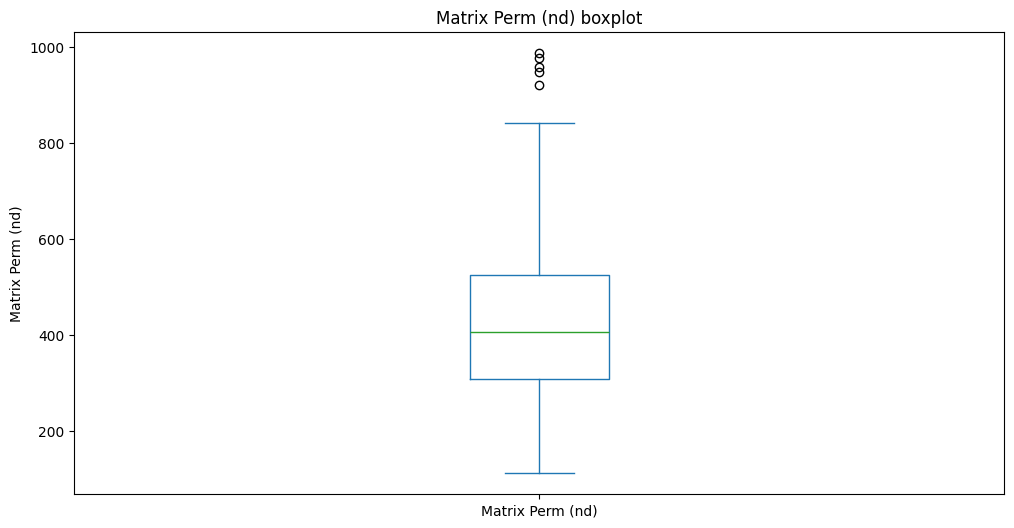

In [168]:
# box plot for Porosity (%)
df['Matrix Perm (nd)'].plot(kind='box', figsize=(12, 6), title='Matrix Perm (nd) boxplot', ylabel='Matrix Perm (nd)')
plt.show()

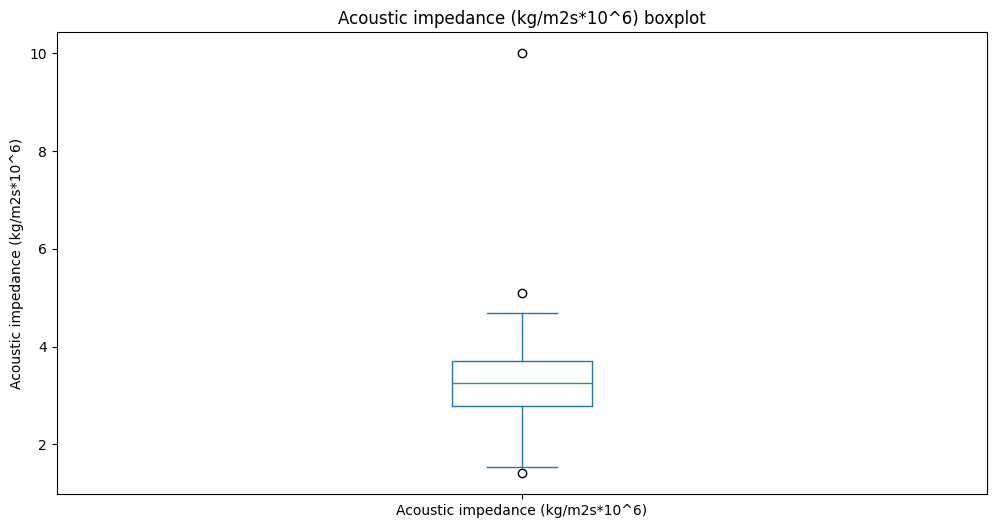

In [169]:
# box plot for Porosity (%)
df['Acoustic impedance (kg/m2s*10^6)'].plot(kind='box', figsize=(12, 6), title='Acoustic impedance (kg/m2s*10^6) boxplot', ylabel='Acoustic impedance (kg/m2s*10^6)')
plt.show()

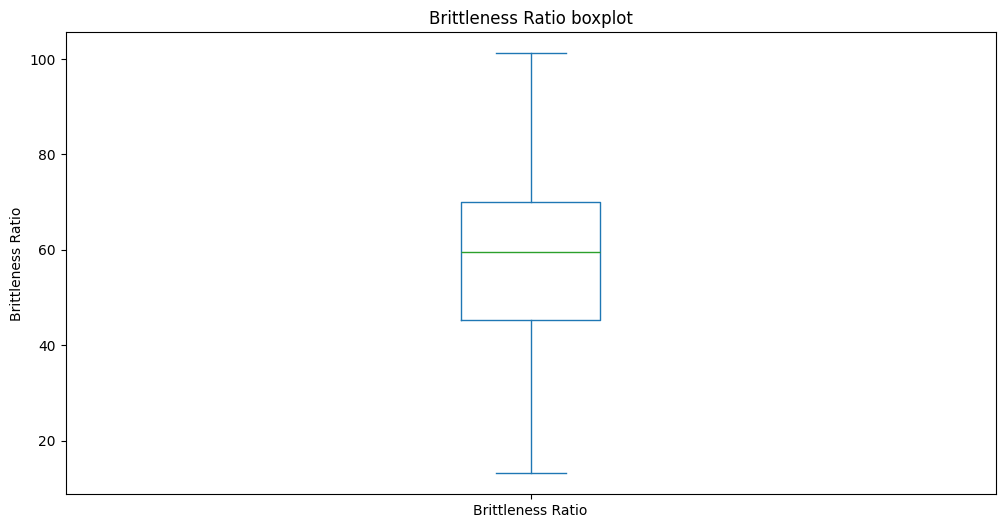

In [170]:
# box plot for Porosity (%)
df['Brittleness Ratio'].plot(kind='box', figsize=(12, 6), title='Brittleness Ratio boxplot', ylabel='Brittleness Ratio')
plt.show()

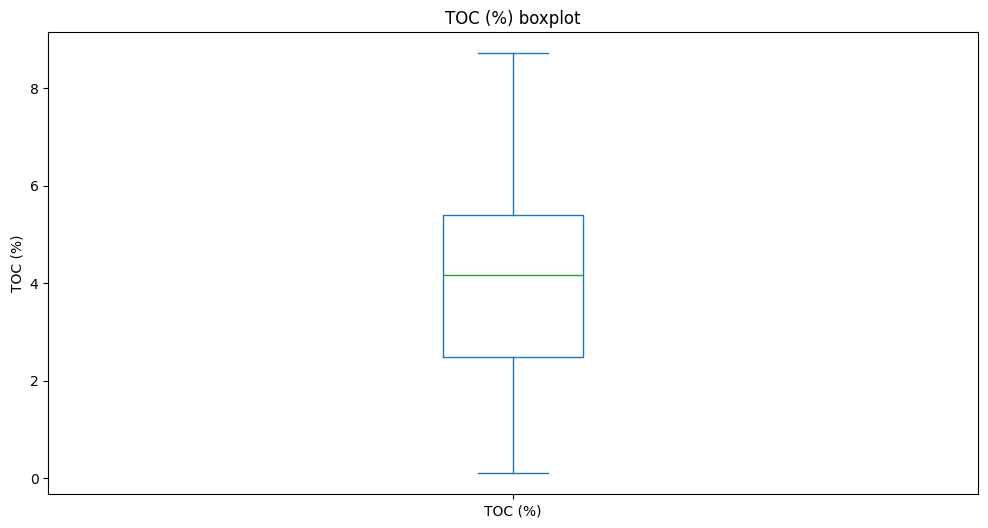

In [171]:
# box plot for Porosity (%)
df['TOC (%)'].plot(kind='box', figsize=(12, 6), title='TOC (%) boxplot', ylabel='TOC (%)')
plt.show()

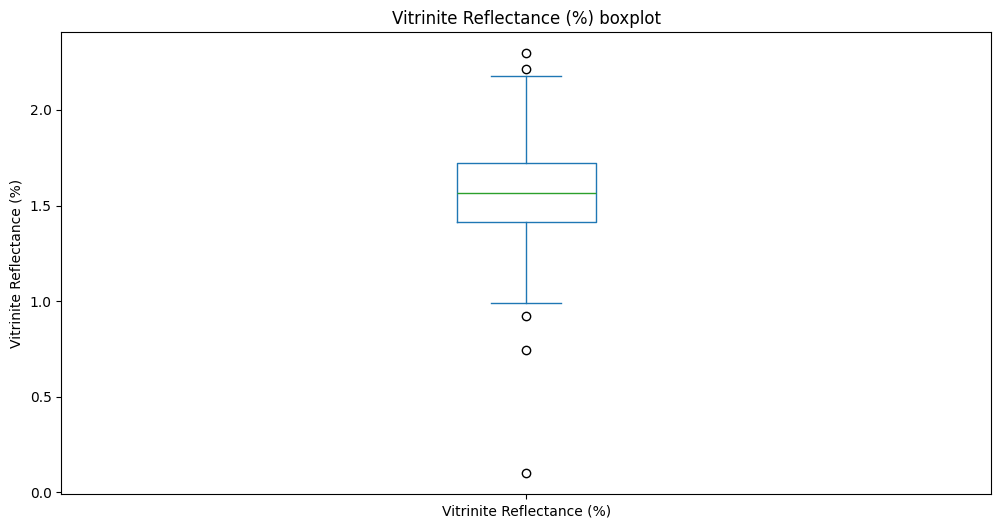

In [172]:
# box plot for Porosity (%)
df['Vitrinite Reflectance (%)'].plot(kind='box', figsize=(12, 6), title='Vitrinite Reflectance (%) boxplot', ylabel='Vitrinite Reflectance (%)')
plt.show()

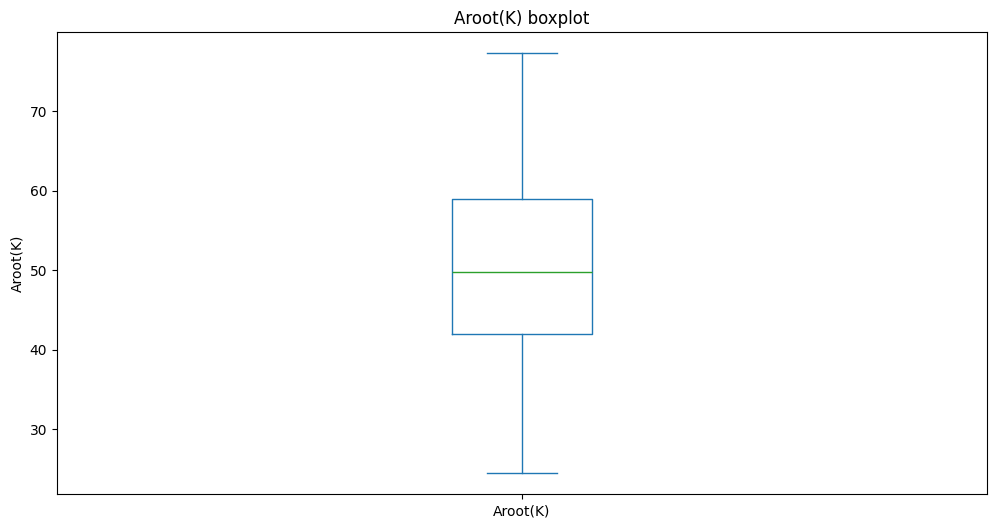

In [173]:
# box plot for Porosity (%)
df['Aroot(K)'].plot(kind='box', figsize=(12, 6), title='Aroot(K) boxplot', ylabel='Aroot(K)')
plt.show()

In [174]:
# create a helper function to remove outliers
def remove_outliers(df, col):
    # rows before filtering
    n_before = df.shape[0]

    # filter outliers
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    df = df[(df[col] > lower) & (df[col] < upper)]

    # rows after filtering
    n_after = df.shape[0]
    print(f"Removed {n_before - n_after} outliers for {col}. {n_after} rows remaining.")

    # return filtered dataframe
    return df

# remove outliers
df = remove_outliers(df, 'Porosity (%)')
df = remove_outliers(df, 'Matrix Perm (nd)')
df = remove_outliers(df, 'Acoustic impedance (kg/m2s*10^6)')
df = remove_outliers(df, 'Brittleness Ratio')
df = remove_outliers(df, 'TOC (%)')
df = remove_outliers(df, 'Vitrinite Reflectance (%)')
df = remove_outliers(df, 'Aroot(K)')

Removed 0 outliers for Porosity (%). 197 rows remaining.
Removed 5 outliers for Matrix Perm (nd). 192 rows remaining.
Removed 3 outliers for Acoustic impedance (kg/m2s*10^6). 189 rows remaining.
Removed 0 outliers for Brittleness Ratio. 189 rows remaining.
Removed 0 outliers for TOC (%). 189 rows remaining.
Removed 6 outliers for Vitrinite Reflectance (%). 183 rows remaining.
Removed 0 outliers for Aroot(K). 183 rows remaining.


Remove impractical values

In [175]:
# remove values of Porosity (%) greater than 100%
df = df[df['Porosity (%)'] < 100]

# remove negative Matrix Perm (nd) values
df = df[df['Matrix Perm (nd)'] > 0]

# remove negative Acoustic impedance (kg/m2s*10^6) values
df = df[df['Acoustic impedance (kg/m2s*10^6)'] > 0]

# remove values of Brittleness Ratio greater than 100%
df = df[df['Brittleness Ratio'] < 100]

# remove values of TOC (%) greater than 100%
df = df[df['TOC (%)'] < 100]

# remove values of Vitrinite Reflectance (%) greater than 100%
df = df[df['Vitrinite Reflectance (%)'] < 100]

# remove negative Aroot(K) values
df = df[df['Aroot(K)'] > 0]

df.describe()

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,10.407346,415.961538,3.242038,57.867560,3.957253,1.567165,49.566823
std,2.004230,148.485368,0.596425,16.378566,1.904932,0.211144,11.079263
min,4.585000,113.000000,1.529000,13.128000,0.100000,1.024000,24.437856
25%,9.047500,310.750000,2.796750,45.651000,2.410000,1.418000,41.886884
50%,10.549000,401.000000,3.223000,59.712000,4.160000,1.564000,49.675513
75%,11.959500,510.000000,3.619000,69.840000,5.390000,1.680000,57.243614
max,14.602000,841.000000,4.686000,97.680000,8.320000,2.080000,75.154377


<h3>Correlation Analysis</h3>

Calculate correlation between parameters

In [176]:
# calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Porosity (%),Matrix Perm (nd),Acoustic impedance (kg/m2s*10^6),Brittleness Ratio,TOC (%),Vitrinite Reflectance (%),Aroot(K)
Porosity (%),1.000000,0.750368,-0.448325,-0.179271,0.707600,0.222025,0.869337
Matrix Perm (nd),0.750368,1.000000,-0.239263,-0.084546,0.488874,0.143091,0.715376
Acoustic impedance (kg/m2s*10^6),-0.448325,-0.239263,1.000000,0.020403,-0.550790,0.412461,-0.443483
Brittleness Ratio,-0.179271,-0.084546,0.020403,1.000000,-0.212671,0.198567,0.265406
TOC (%),0.707600,0.488874,-0.550790,-0.212671,1.000000,0.360315,0.651593
Vitrinite Reflectance (%),0.222025,0.143091,0.412461,0.198567,0.360315,1.000000,0.363170
Aroot(K),0.869337,0.715376,-0.443483,0.265406,0.651593,0.363170,1.000000


Visualize the correlation between parameters

<Axes: >

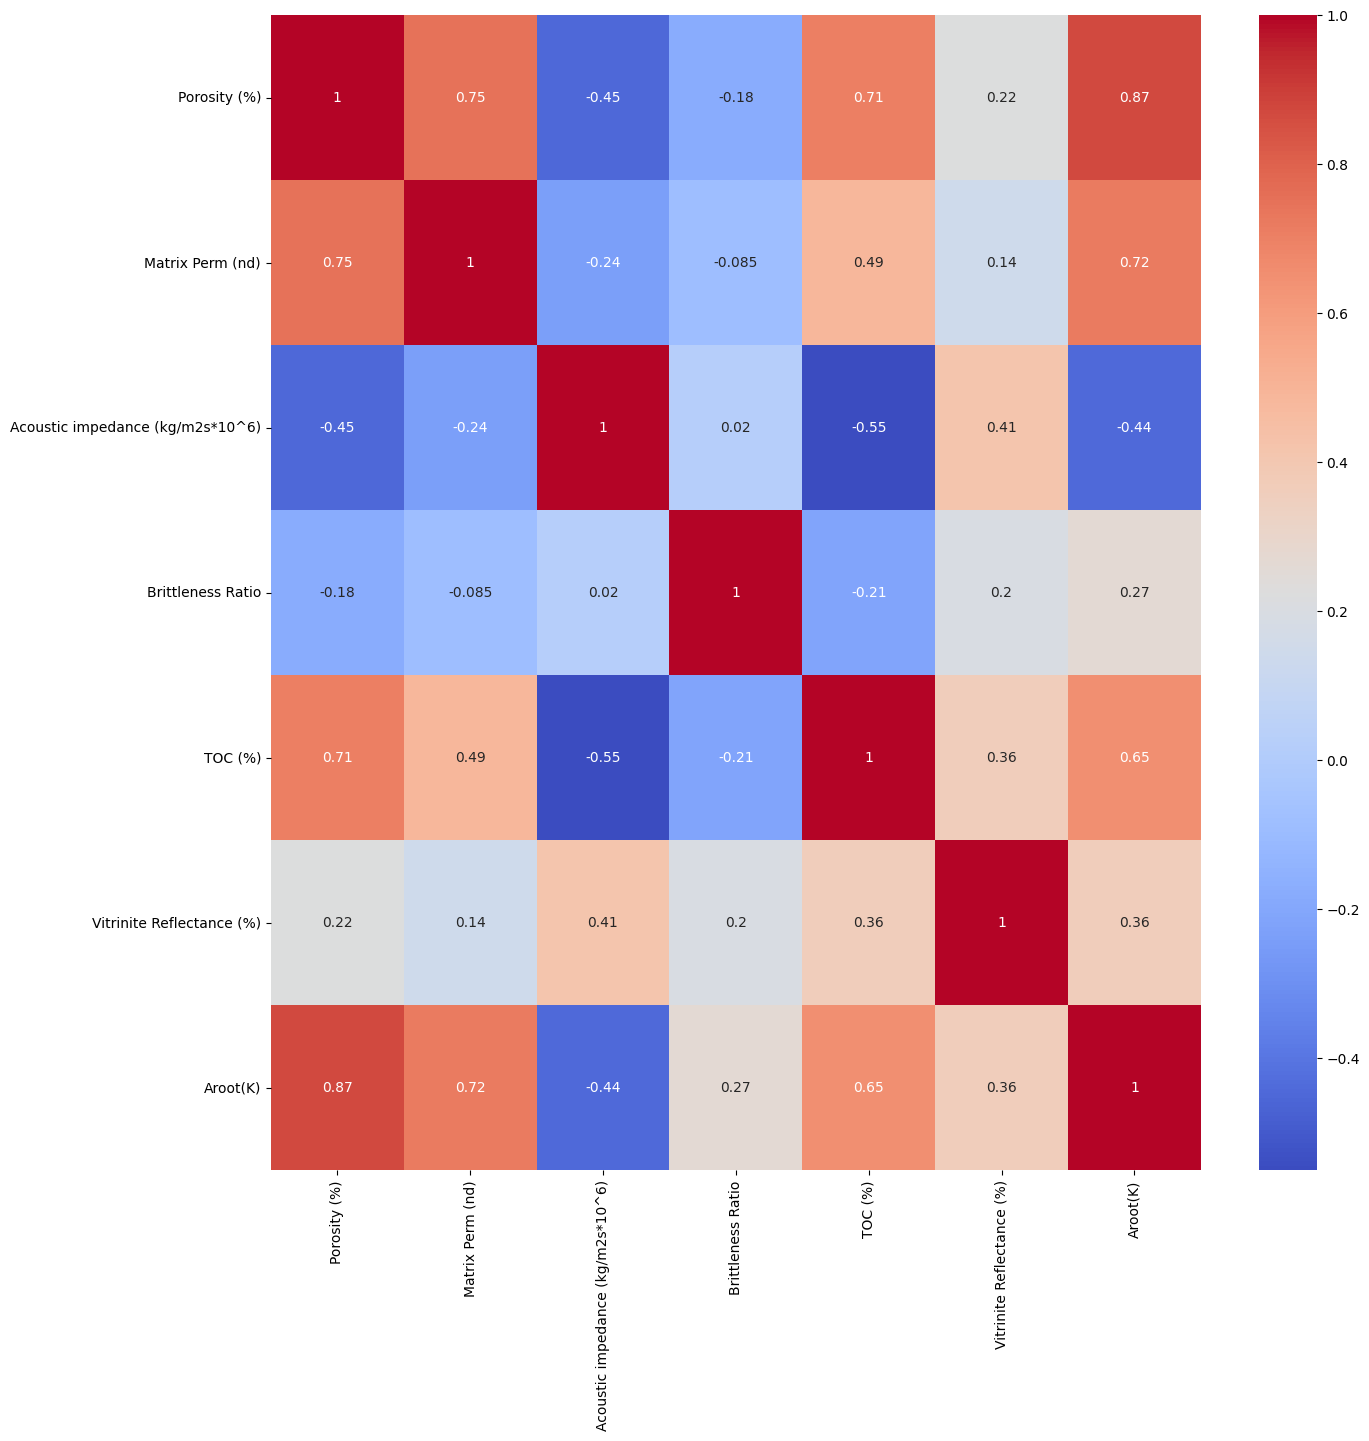

In [177]:
# plot correlation matrix as a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Visualize the correlation trends

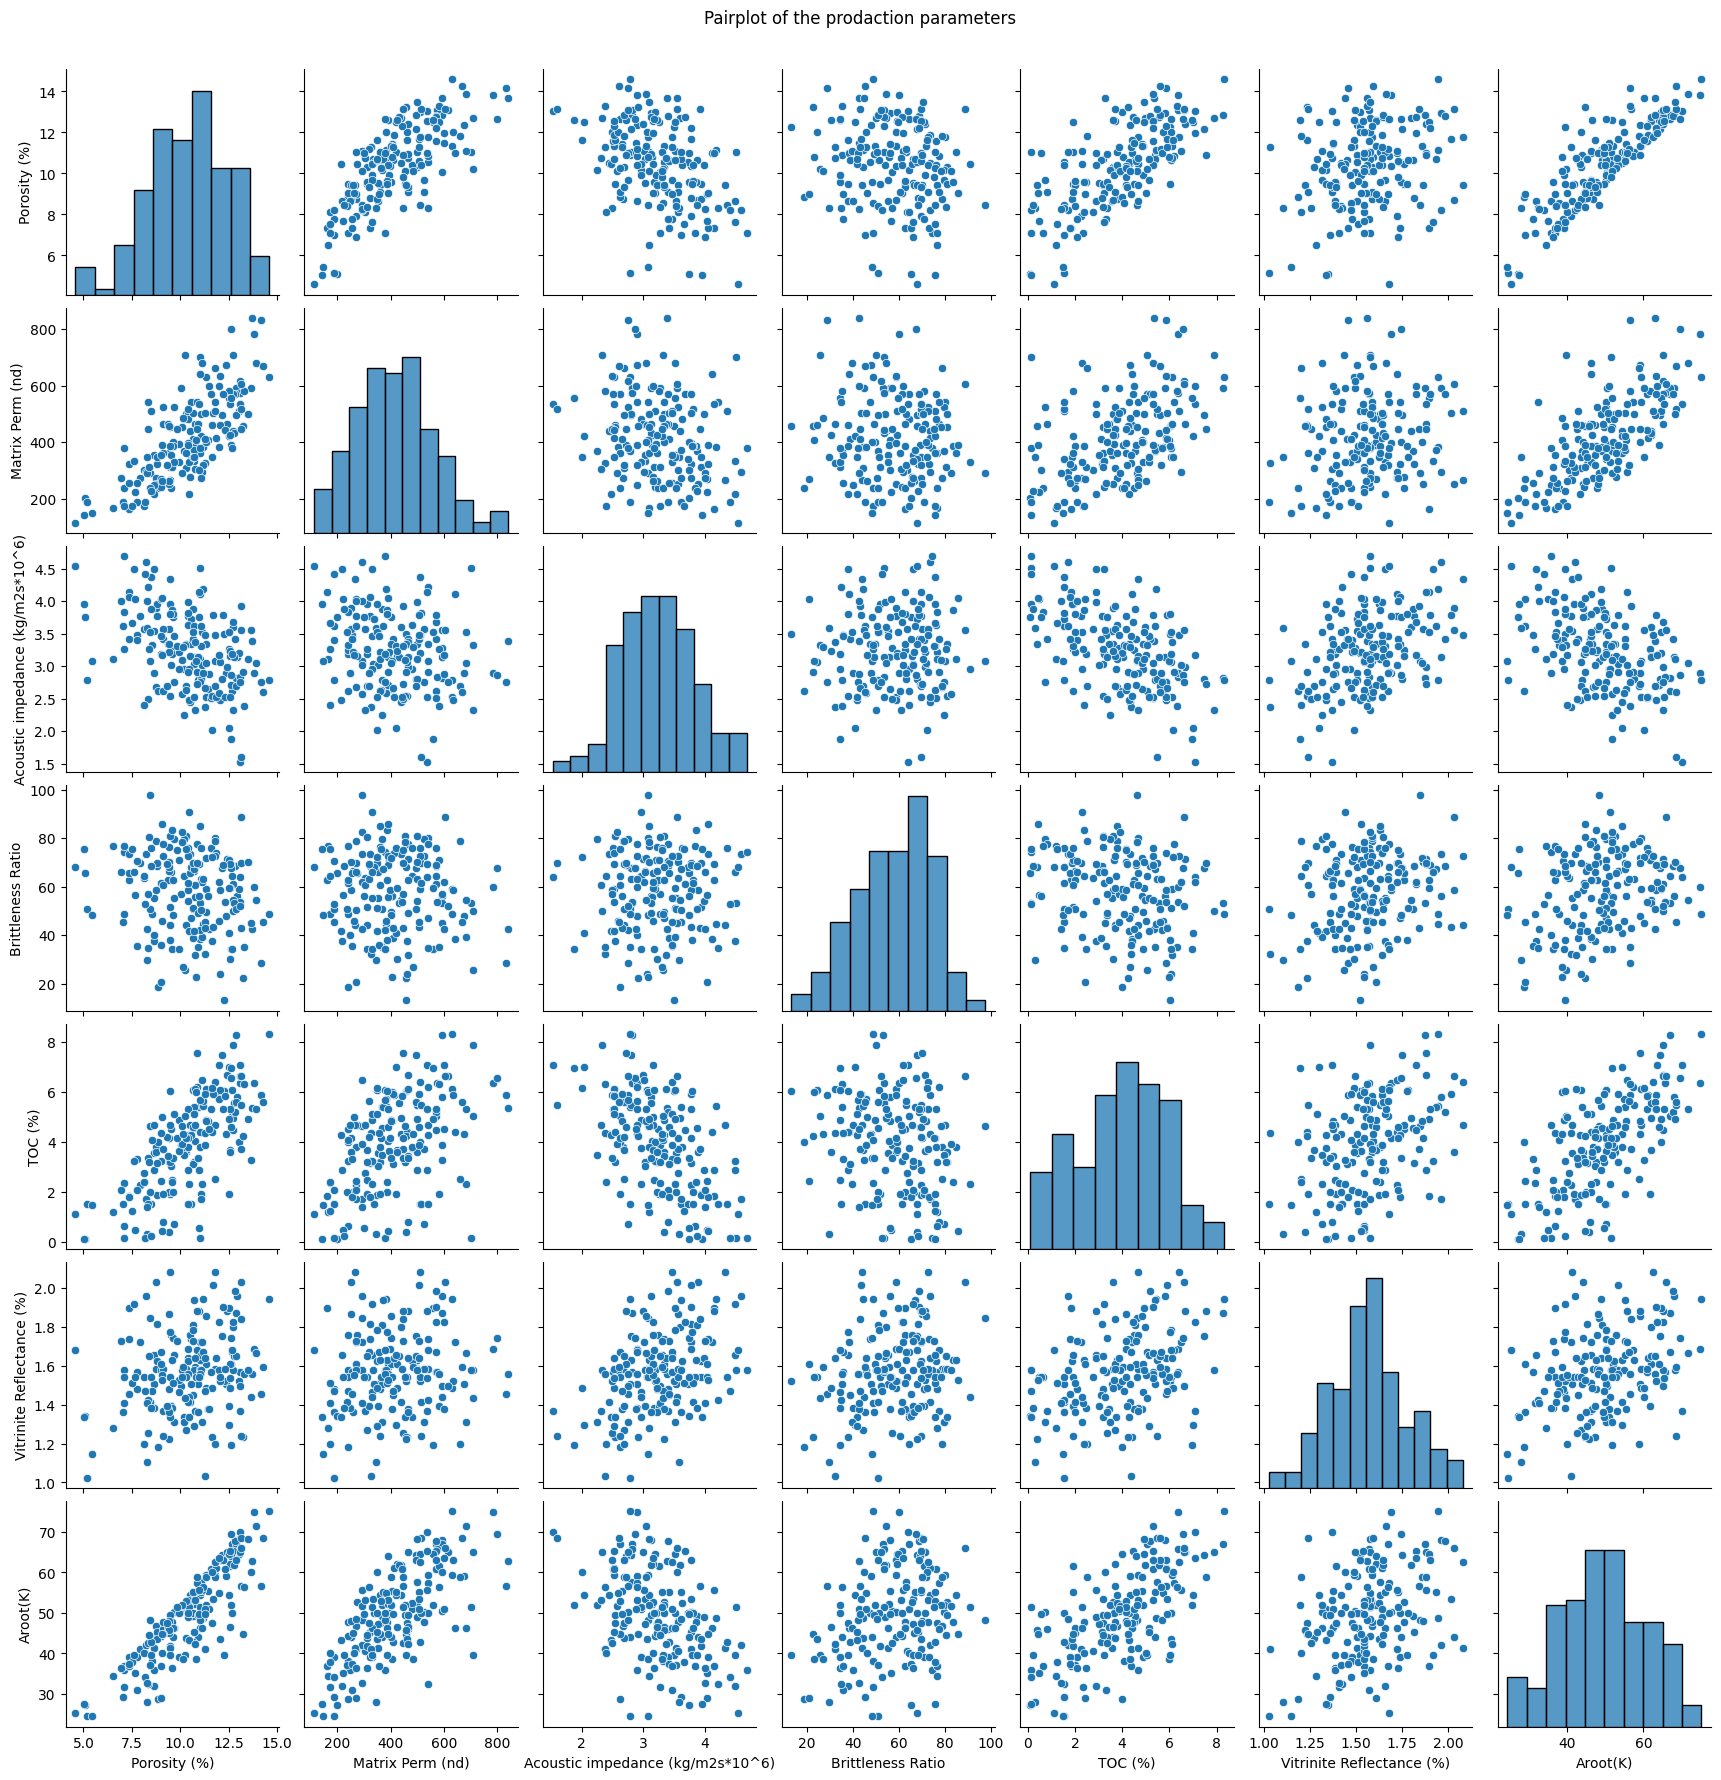

In [178]:
# plot scatter matrix (pairplot)
sns.pairplot(df)

# add figure title
plt.suptitle('Pairplot of the prodaction parameters', y=1.02)

plt.show()

<hr id="model">

<h2>5. Model Development and Evaluation</h2>

Let's first define a helper function to automate evaluating different models

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import pipeline

# get x and y
x = df.drop('Aroot(K)', axis=1)
y = df['Aroot(K)']

# helper function to fit the model and evaluate it
def fit_model(model, x, y):
    # split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    # fit the model on the training set
    model.fit(x_train, y_train)

    # predict the output on the training and testing sets
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # evaluate the model on the training and testing sets
    print('Training set:')
    print('MSE: {:.2f}'.format(mean_squared_error(y_train, y_train_pred)))
    print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
    print('R2: {:.2f}'.format(r2_score(y_train, y_train_pred)))
    print()
    print('Test set:')
    print('MSE: {:.2f}'.format(mean_squared_error(y_test, y_test_pred)))
    print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test, y_test_pred))))
    print('R2: {:.2f}'.format(r2_score(y_test, y_test_pred)))        
    
    # create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # plot actual vs. predicted values for the training and testing sets
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, label='Training set')
    plt.scatter(y_test, y_test_pred, label='Test set')
    plt.plot(y, y, 'k')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title('Actual vs. Predicted values')
    plt.legend()
    
    # plot residuals vs. predicted values for the testing set
    plt.subplot(1, 2, 2)
    plt.scatter(y_train_pred, y_train_pred - y_train, label='Training set')
    plt.scatter(y_test_pred, y_test_pred - y_test, label='Test set')
    plt.axhline(y=0, color='k')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Predicted values')
    plt.legend()

    # show the plots
    plt.show()

### Linear Regression

Training set:
MSE: 4.58
RMSE: 2.14
R2: 0.96

Test set:
MSE: 4.62
RMSE: 2.15
R2: 0.96


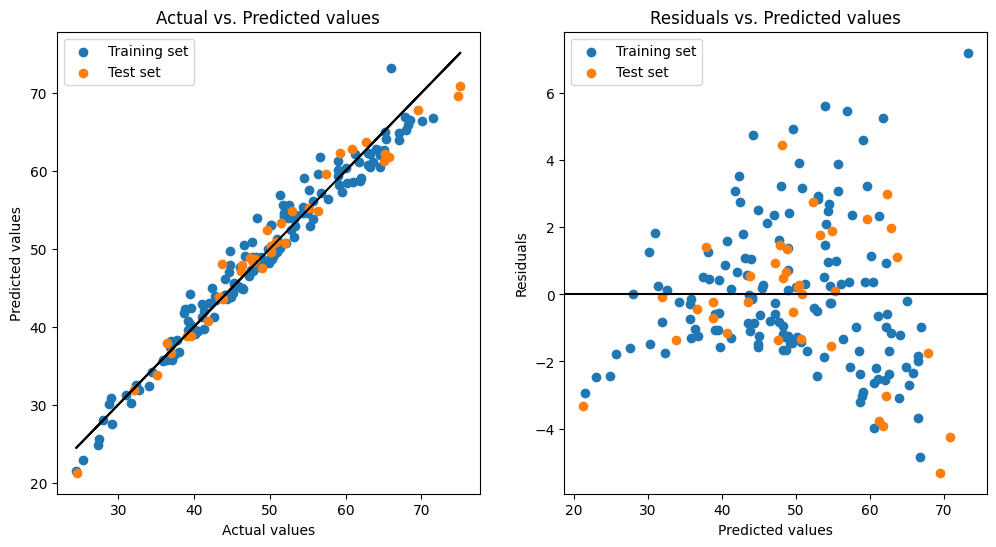

In [180]:
from sklearn.linear_model import LinearRegression

# create a linear regression model
lr_pipe = pipeline.Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# fit the model and evaluate it
fit_model(lr_pipe, x, y)

### Polynomial Regression

Training set:
MSE: 0.73
RMSE: 0.86
R2: 0.99

Test set:
MSE: 2.36
RMSE: 1.54
R2: 0.98


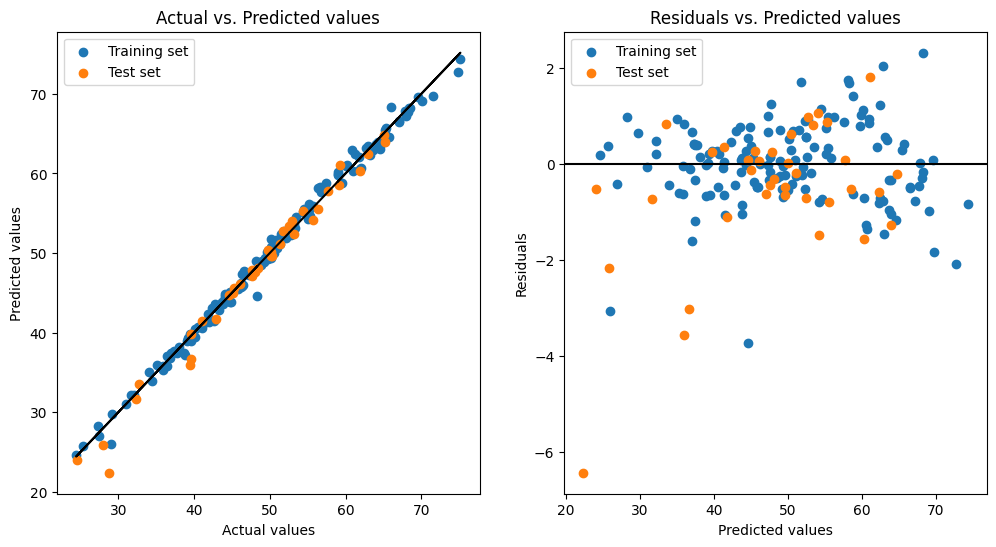

In [181]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

# create a polynomial regression model
poly_pipe = pipeline.Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('lr', LinearRegression())
])

# fit the model and evaluate it
fit_model(poly_pipe, x, y)

In [182]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# create a linear regression model
lr = LinearRegression()

# split the data into training and testing sets
X = df.drop('Aroot(K)', axis=1)
Y = df['Aroot(K)']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# fit the model to the training data
lr.fit(X_train, y_train)

# make predictions using the testing set
y_pred = lr.predict(X_test)

# print the coefficients
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

Coefficients: 
 [ 3.81093165  0.0116057  -3.79428446  0.23614307 -0.21823596 11.32457456]
Intercept: 
 -13.27171225172507


In [185]:
prodation = lr.predict([[4.5,114,4.5,68,1.3,1.5]])
print('the predicting production performance in unconventional reservoirs \n', prodation)

the predicting production performance in unconventional reservoirs 
 [20.88713426]


c:\Users\Halawany Laptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
